THIS PROJECT WILL PREDICT THE REVIEWS OF BOARD GAMES THROUGH ML ALGORITMS i.e LINEAR REGRESSION AND RANDOM FOREST

IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path='https://raw.githubusercontent.com/amrith8/BoardGamesDataAnalysis/master/board_games.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


DATA PRE-PROCESSING

In [5]:
print(df.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [6]:
print(df.shape)

(81312, 20)


In [7]:
df=df[df['users_rated']>0]

In [8]:
df.shape

(56932, 20)

In [9]:
df.drop(["id","type","name"],inplace=True , axis = 1)

In [10]:
df

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81260,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,16,0,0,1,2,1,1.0000
81261,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,19,0,0,1,2,1,1.0000
81263,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,22,0,0,0,2,1,1.0000
81278,2012.0,2.0,2.0,0.0,10.0,0.0,8.0,1,7.00000,0.00000,0,0,0,0,1,0,0.0000


In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
missing_data=df.isnull()
missing_data

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
56928,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
56929,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
56930,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('-------------------')

yearpublished
False    56930
True         2
Name: yearpublished, dtype: int64
-------------------
minplayers
False    56930
True         2
Name: minplayers, dtype: int64
-------------------
maxplayers
False    56930
True         2
Name: maxplayers, dtype: int64
-------------------
playingtime
False    56930
True         2
Name: playingtime, dtype: int64
-------------------
minplaytime
False    56930
True         2
Name: minplaytime, dtype: int64
-------------------
maxplaytime
False    56930
True         2
Name: maxplaytime, dtype: int64
-------------------
minage
False    56930
True         2
Name: minage, dtype: int64
-------------------
users_rated
False    56932
Name: users_rated, dtype: int64
-------------------
average_rating
False    56932
Name: average_rating, dtype: int64
-------------------
bayes_average_rating
False    56932
Name: bayes_average_rating, dtype: int64
-------------------
total_owners
False    56932
Name: total_owners, dtype: int64
-------------------
total_trad

In [14]:
df=df.fillna(0)

In [15]:
df.dropna(axis=0)

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56927,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,16,0,0,1,2,1,1.0000
56928,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,19,0,0,1,2,1,1.0000
56929,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,8.00000,0.00000,22,0,0,0,2,1,1.0000
56930,2012.0,2.0,2.0,0.0,10.0,0.0,8.0,1,7.00000,0.00000,0,0,0,0,1,0,0.0000


In [16]:
df.replace('?',-99999,inplace=True)

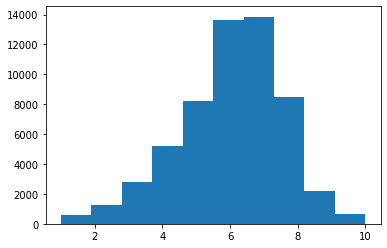

In [17]:
plt.hist(df['average_rating'])
plt.show()

In [18]:
x=df[['yearpublished','minplayers','maxplayers','playingtime','minplaytime','maxplaytime','minage','users_rated','bayes_average_rating','total_owners','total_traders','total_wanters','total_wishers','total_comments','total_weights','average_weight']]

In [19]:
x

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56927,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,0.00000,16,0,0,1,2,1,1.0000
56928,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,0.00000,19,0,0,1,2,1,1.0000
56929,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,0.00000,22,0,0,0,2,1,1.0000
56930,2012.0,2.0,2.0,0.0,10.0,0.0,8.0,1,0.00000,0,0,0,0,1,0,0.0000


In [20]:
x.shape

(56932, 16)

In [21]:
x.values.reshape(1,-1).shape

(1, 910912)

In [22]:
x.shape

(56932, 16)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56932 entries, 0 to 56931
Data columns (total 17 columns):
yearpublished           56932 non-null float64
minplayers              56932 non-null float64
maxplayers              56932 non-null float64
playingtime             56932 non-null float64
minplaytime             56932 non-null float64
maxplaytime             56932 non-null float64
minage                  56932 non-null float64
users_rated             56932 non-null int64
average_rating          56932 non-null float64
bayes_average_rating    56932 non-null float64
total_owners            56932 non-null int64
total_traders           56932 non-null int64
total_wanters           56932 non-null int64
total_wishers           56932 non-null int64
total_comments          56932 non-null int64
total_weights           56932 non-null int64
average_weight          56932 non-null float64
dtypes: float64(10), int64(7)
memory usage: 7.4 MB


In [24]:
y=df['average_rating']

In [25]:
y

0        8.33774
1        8.28798
2        8.28994
3        8.20407
4        8.14261
          ...   
56927    8.00000
56928    8.00000
56929    8.00000
56930    7.00000
56931    7.00000
Name: average_rating, Length: 56932, dtype: float64

In [26]:
y.shape

(56932,)

In [27]:
y.values.reshape(1,-1).shape

(1, 56932)

SPLITTING DATA FOR TESTING AND TRAINING

In [28]:
mask=np.random.rand(len(df)) < 0.8

In [29]:
train=df[mask]

In [30]:
test=df[~mask]

MODELLING

In [31]:
from sklearn  import linear_model

In [32]:
lr=linear_model.LinearRegression()

In [33]:
train_x=np.asanyarray(train[['yearpublished','minplayers','maxplayers','playingtime','minplaytime','maxplaytime','minage','users_rated','bayes_average_rating','total_owners','total_traders','total_wanters','total_wishers','total_comments','total_weights','average_weight']])

In [34]:
train_y=np.asanyarray(train[['average_rating']])

In [35]:
pd.isnull(train_x).sum() > 0

False

In [36]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print('Coefficient : ',lr.coef_)
print('Intercept : :',lr.intercept_)

Coefficient :  [[ 1.69851746e-04 -6.85475126e-02 -1.32410427e-04  5.90337110e-05
  -8.14601115e-05  5.90337110e-05  3.75234666e-02 -5.95569642e-04
   4.72443020e-03  3.87623971e-04 -3.53224742e-03  3.97913359e-03
  -4.50308198e-04  4.53956416e-04  7.97241998e-04  3.51422379e-01]]
Intercept : : [5.04058811]


In [38]:
from sklearn.metrics import r2_score

In [39]:
test_x=np.asanyarray(test[['yearpublished','minplayers','maxplayers','playingtime','minplaytime','maxplaytime','minage','users_rated','bayes_average_rating','total_owners','total_traders','total_wanters','total_wishers','total_comments','total_weights','average_weight']])

In [40]:
test_y=np.asanyarray(test[['average_rating']])

In [41]:
test_yhat=lr.predict(test_x)

In [42]:
a=r2_score(test_y,test_yhat)

In [43]:
a

0.16349736857190644

In [44]:
b=np.mean(np.absolute(test_yhat - test_y))

In [45]:
b

1.08578202226986

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mse=mean_squared_error(test_yhat,test_y)

In [48]:
mse

2.079793054342143

In [49]:
test_case=df.iloc[100]

In [50]:
test_case=test_case.values.reshape(1,-1)

In [51]:
test_x.reshape(1,-1)

array([[2.005e+03, 2.000e+00, 2.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00]])

In [52]:
train_x.reshape(1,-1)

array([[2.012e+03, 2.000e+00, 5.000e+00, ..., 0.000e+00, 2.000e+00,
        1.500e+00]])

In [53]:
test_y.reshape(1,-1)

array([[8.33774, 8.11957, 7.93301, ..., 8.     , 7.5    , 8.     ]])

In [54]:
train_x.reshape(1,-1)

array([[2.012e+03, 2.000e+00, 5.000e+00, ..., 0.000e+00, 2.000e+00,
        1.500e+00]])

In [55]:
test_yhat.reshape(1,-1)

array([[10.71511467,  8.09176375,  9.10937962, ...,  5.82415245,
         5.76880415,  6.12367446]])

In [56]:
x.shape

(56932, 16)

RANDOM FOREST REGRESSION

In [57]:
from sklearn.ensemble import RandomForestRegressor 

In [59]:
rfr=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

In [60]:
rfr.fit(train_x,train_y)

C:\Users\Ayush Tripathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [61]:
yhat1=rfr.predict(test_x)

In [62]:
yhat1

array([7.95681551, 7.92975162, 7.93740715, ..., 7.51972382, 7.50141376,
       7.80924078])

In [63]:
mse1=mean_squared_error(yhat1,test_y)

In [64]:
mse1

1.4053347102018907

In [65]:
a1=r2_score(test_y,yhat1)

In [66]:
a1

0.434767713707477

In [68]:
b=np.mean(np.absolute(yhat1 - test_y))

In [69]:
b

1.4971293046264595

TESTING THE TEST CASE

In [70]:
test = x.iloc[100]

In [71]:
test

yearpublished           2013.00000
minplayers                 2.00000
maxplayers                 2.00000
playingtime               90.00000
minplaytime               90.00000
maxplaytime               90.00000
minage                    14.00000
users_rated             1851.00000
bayes_average_rating       7.36052
total_owners            3423.00000
total_traders             69.00000
total_wanters            460.00000
total_wishers           1584.00000
total_comments           426.00000
total_weights            151.00000
average_weight             2.77480
Name: 100, dtype: float64

In [72]:
test_final = lr.predict(test.values.reshape(1,-1))

In [74]:
test_final

array([[8.19525872]])

In [75]:
real_test=print(y.iloc[100])

8.113439999999999


In [76]:
print(df.iloc[100])

yearpublished           2013.00000
minplayers                 2.00000
maxplayers                 2.00000
playingtime               90.00000
minplaytime               90.00000
maxplaytime               90.00000
minage                    14.00000
users_rated             1851.00000
average_rating             8.11344
bayes_average_rating       7.36052
total_owners            3423.00000
total_traders             69.00000
total_wanters            460.00000
total_wishers           1584.00000
total_comments           426.00000
total_weights            151.00000
average_weight             2.77480
Name: 100, dtype: float64
